# Demonstration of $K$-means algorithm

**Name: Dahye Kim (김다혜)**  
**ID: 20153712**  
**Date: 04 October 2018**  
**Project Github: https://github.com/joyfuldahye/MFCVML_assignment03**  

--------------------------------------------------------------------------

# Essential Visualisation
1. Input data
2. Initial label
3. Initial centroid
4. Final label
5. Final centroid
6. Energy per each iteration

# Essential Functions
1. generatePointCluster: (number of clusters, number of points)
2. computeDistance: (a pair of points)
3. initialseLabel: (number of clusters)
4. computeCentroid: (number of clusters)
5. assignLabel: (number of clusters, list of distances)
6. computeEnergy: (list of data, list of labels)

## 0. Import packages for plotting graphs and manipulation data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## 1. Generate point cluster

In [2]:
data =[[0.7,  3.0],
            [5.0,  2.5],
            [3.8,  6.0],
            [9.0,  7.0],
            [2.5,  9.0],
            [9.8,  1.5],
            [5.8,  5.0], 
            [7.0,  3.2],
            [2.8,  6.0],
            [1.6,  2.8],
            [4.5,  3.6],
            [7.2,  7.5],
            [6.0,  8.0],
            [2.0,  3.2],
            [3.0,  8.0],
            [8.0,  9.8],
            [3.5,  7.4],
            [1.2,  2.4],
            [0.2,  8.5],
            [3.6,  2.6],
            [7.2,  7.1],
            [8.9,  9.3],
            [1.3,  1.6],
            [5.2,  7.2],
            [6.7,  5.5],
            [9.2,  6.2],
            [4.3,  7.3],
            [6.2,  8.4],
            [7.3,  3.7]]


### Plot input points

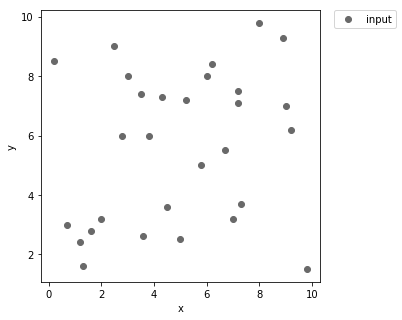

In [3]:
xs, ys = zip(*data)
plt.figure(figsize=(5, 5))
plt.scatter(x = xs, y = ys, color='dimgrey', label = "input")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

> An initial state of points

## 2. Define a function to randomly assign labels to each point

In [4]:
def initialiseLabel(data, k):
    labels = []
    for i in range(len(data)):
        labels.append(np.random.choice(range(k)))
    return labels

## 3. Define a function to compute centroids with given points and labels: $z_j = (1/|G_j|)\displaystyle\sum_{i\in G_j}x_i$

In [5]:
def computeCentroid(data, labels, k):
    centroids = []
    for label in range(k):
        label_data_xs = []
        label_data_ys = []
        for i in range(len(data)):
            if labels[i] == label:
                label_data_xs.append(data[i][0])
                label_data_ys.append(data[i][1])
        centroids.append([np.mean(label_data_xs), np.mean(label_data_ys)])
    return centroids

## 4. Plot randomly labeled points and the centroid of  each label group

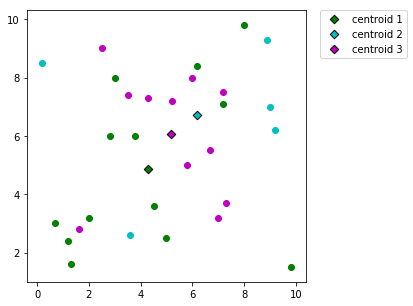

In [6]:
k = 3
init_labels = initialiseLabel(data, k)
init_centroids = computeCentroid(data, init_labels, k)
colors = ['g', 'c', 'm']

plt.figure(figsize=(5, 5))
for i in range(len(data)):
    x = data[i][0]
    y = data[i][1]
    label = init_labels[i]
    plt.scatter(x=x, y=y, color=colors[label])

for i in range(len(init_centroids)):
    centroid_x = init_centroids[i][0]
    centroid_y = init_centroids[i][1]
    plt.scatter (x = centroid_x, y = centroid_y, color = colors[i], marker = "D", edgecolor='black', label=f"centroid {i+1}")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

> Each color stands for each label. At this moment, it's hard to find any similarity among points in the same group, because labels are randomly assigned.

## 5. Define a function to compute distance: $distances_{ij}=\Vert x_i - z_j\Vert$

In [7]:
def computeDistance(data, labels, centroids):
    # distances contains all distance info
    distances = []
    for i in range(len(data)):
        data_x = data[i][0]
        data_y = data[i][1]
        
        # distance contain each centroid distance
        distance = []
        for centroid in centroids:
            centroid_x = centroid[0]
            centroid_y = centroid[1]
            
            # distance_k is a distance from k centroid
            distance_k = np.sqrt((data_x - centroid_x) ** 2  + (data_y - centroid_y) ** 2)
            distance.append(distance_k)
        distances.append(distance)
    return distances

## 6. Define a function to assign the closest centroid as a new label

In [8]:
def assignLabel(k, distances):
    labels = []
    # Assign the closest centroid as a label
    for i in range(len(distances)):
        distance = distances[i]
        labels.append(np.argmin(distance))
    return labels

> At first, we randomly assigned labels to points because because we didn't have available distance info. However, after assigning initial labels, we can calculate distance between the centroid of each group and each point. It enables assinging a new label according to the distance.

## 7. Calculate distances and assign new labels

In [9]:
distances = computeDistance(data, init_labels, init_centroids)
new_labels = assignLabel(3, distances)

## 8. Plot newly clustered result with the new centroids and labels

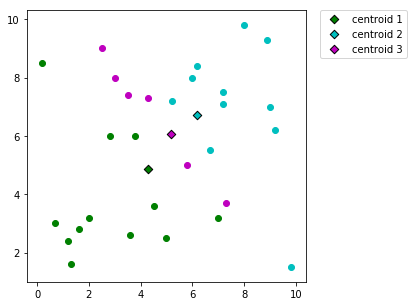

In [10]:
init_centroids = computeCentroid(data, init_labels, 3)
colors = ['g', 'c', 'm']

plt.figure(figsize=(5, 5))

for i in range(len(data)):
    x = data[i][0]
    y = data[i][1]
    label = new_labels[i]
    plt.scatter(x=x, y=y, color=colors[label])

for i in range(len(init_centroids)):
    centroid_x = init_centroids[i][0]
    centroid_y = init_centroids[i][1]
    plt.scatter (x = centroid_x, y = centroid_y, color = colors[i], marker = "D", edgecolor='black', label=f"centroid {i+1}")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

> This new result shows the stronger similarity among points in the same group than the previous result.

## 9. Define a function to compute energy: $J_j = (1/N)\displaystyle\sum_{i\in G_j}\Vert x_i - z_j\Vert^2$

In [11]:
def computeEnergy(distances, labels):
    J = 0
    N = len(distances)
    for i in range(N):
        # distance has info distances between ith data and each centroid
        distance = distances[i]
        # find the data label's centroid distance
        distance_k = distance[labels[i]]
        J = J + distance_k ** 2 
    J = J / N
    return J

## 10. Repeat computing new centroids and assigning new labels until centroids do not change

* Compute energy at every each iteration

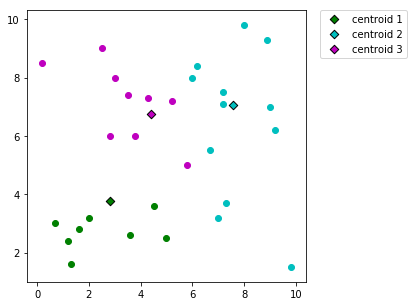

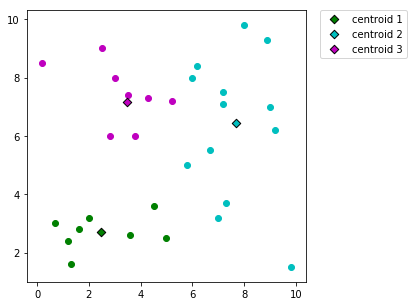

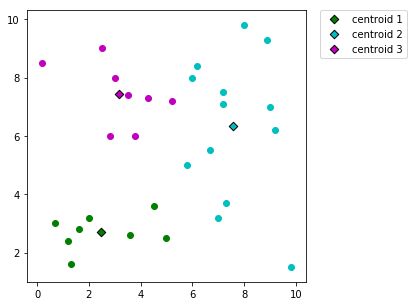

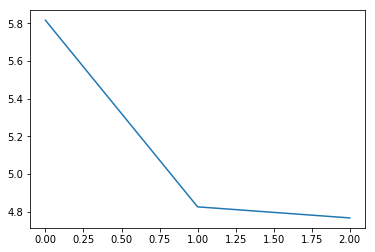

In [12]:
prev_centroids = init_centroids
prev_labels = new_labels

energies = []

# Until centroids do not change,
# repeat computing new centroids and assigning new labels to the points with the centroids
while True:
    new_centroids = computeCentroid(data, prev_labels, 3)
    distances = computeDistance(data, prev_labels, new_centroids)
    new_labels = assignLabel(3, distances)

    # When centroids do not change any more, break this loop
    if prev_centroids == new_centroids:
        break
    prev_centroids = new_centroids
    prev_labels = new_labels
    # Compute energy 
    energies.append(computeEnergy(distances, new_labels))
    
    plt.figure(figsize=(5, 5))
    
    # Plot the graph
    for i in range(len(data)):
        x = data[i][0]
        y = data[i][1]
        label = new_labels[i]
        plt.scatter(x=x, y=y, color=colors[label])

    for i in range(len(init_centroids)):
        centroid_x = new_centroids[i][0]
        centroid_y = new_centroids[i][1]
        plt.scatter (x = centroid_x, y = centroid_y, color = colors[i], marker = "D", edgecolor='black', label=f"centroid {i+1}")
        
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    
plt.plot(energies, label='energies')

In [13]:
energies

[5.817080206453248, 4.825210994040018, 4.766382625994696]

> The size of energy decreases at each iteration step meaning that centroids has been opimized. The second scattergram shows visibly different centroids with the first one. However, the third one is slightly changed compared to the second one. Thus, the size of energy decreases far more from the first one to second one than from the second one to the third one.

## Reference
[1] Plot two-dimensional scatter graph with pandas (http://pandas.pydata.org/pandas-docs/version/0.19.0/visualization.html)  
[2] Generate random float (https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html)  
[3] Indexing and Selecting Data (https://pandas.pydata.org/pandas-docs/stable/indexing.html)  
[4] Selecting Subsets of Data in Pandas (https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c)